In [1]:
from binRead import MySmspec
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:

sm = MySmspec('./matbal-pkg/test/fixture_files/smspec_unsmry_2_года/PREDICT_AN_v2_01.2023.SMSPEC')
df1 = sm.get_data


In [3]:
df = pd.read_excel('./matbal/108wells/Выгрузка_режимы_1А.xlsx',sheet_name='Матрица')

In [4]:
well_list = df.T[0].unique()[1:]
regs_nums = df['Unnamed: 0'].to_numpy()[1:]
regs_names = [f'REGION {int(r)}' for r in regs_nums]
well_names = df.T[0].to_numpy()[2:]

In [5]:

wgpr_df = sm.get_main(['WGPR'], well_list)
wgpr_df = wgpr_df[wgpr_df.index.day == 1]

wbp9_df = sm.get_main(['WBP9'], well_list)
wbp9_df = wbp9_df[wbp9_df.index.day == 1]

wbhp_df = sm.get_main(['WBHP'], well_list)
wbhp_df = wbhp_df[wbhp_df.index.day == 1]


wgpr_arr = wgpr_df.to_numpy()
wbp9_arr = wbp9_df.to_numpy()
wbhp_arr = wbhp_df.to_numpy()



<Axes: >

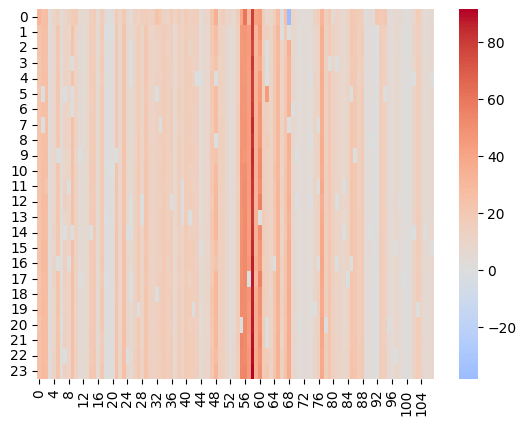

In [6]:
prods = wgpr_arr[:24, :] / (wbp9_arr[:24, :]**2 - wbhp_arr[:24, :]**2)
# sns.lineplot(np.wh)
indecies  = np.where(prods < 0)
prods[indecies]
pd.concat([
    wgpr_df.iloc[indecies],
    wbp9_df.iloc[indecies],
    wbhp_df.iloc[indecies],
    ])

y_pred = np.ones(prods.shape)*prods.mean(0, where=prods >0)

r2_arr = np.array([r2_score(y1,y2) for y1, y2 in zip(prods, y_pred)])

# sns.histplot(r2_arr, bins=108, kde=True)
sns.heatmap(prods, center=0, cmap= 'coolwarm')



<Axes: ylabel='Count'>

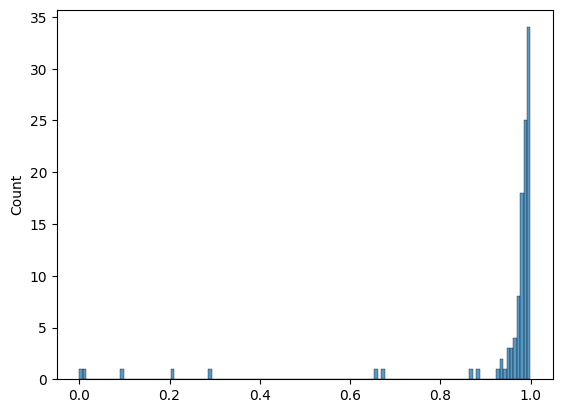

In [37]:
wgp_arr = wgpr_arr*30
y_all = wbp9_arr[:24,:].T
x_all = wgp_arr[:24,:].cumsum(0).T
# sns.lineplot(wgp_arr[:24,:].cumsum(0))
c00_all = np.array([np.polyfit(x,y,deg=1) for x,y in zip(x_all,y_all)])

y_pred = np.array([np.polyval(c00,x) for c00, x,y in zip(c00_all, x_all,y_all)])
r2_all = np.array([r2_score(y2,y1) for y1,y2 in zip(y_pred,y_all)])
# num = 10

# sns.lineplot(x=x_all[num],y=y_pred[num])
# sns.lineplot(x=x_all[num],y=y_all[num])

sns.histplot(r2_all)

'REGION 374:RPR__VOL(BARSA)'

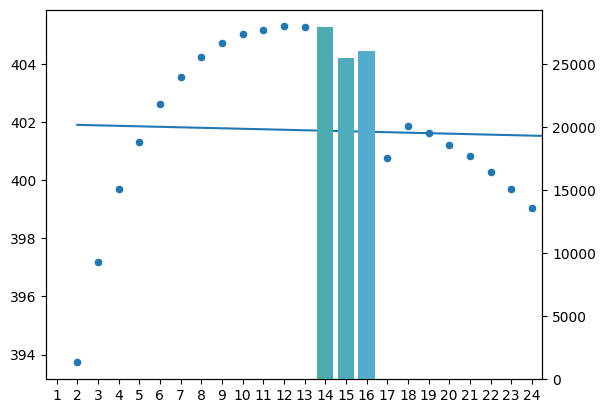

In [ ]:
num = 92
c00 = np.polyfit(np.arange(1,25), wbp9_arr[1:25,num], deg=1)

x, y = np.arange(1,25), wbp9_arr[1:25,num]
y2 = wgpr_arr[1:25,num]
sns.scatterplot(x=x, y=y)
ax = sns.lineplot(x=x, y=np.polyval(c00, x))
sns.barplot(x=x,y=y2, ax=ax.axes.twinx(),  )

r2_score(y,np.polyval(c00,x))
rpr_df.columns[num]
